# Proyecto: Ingenier√≠a de Features, Modelos Avanzados e Interpretaci√≥n de Modelos
<a id='Intro'></a>
## Descripci√≥n

Tomaremos la base de datos y trabajo efectuado durante el **Sprint Project 1** y, utilizando los conocimientos adquiridos durante el **Sprint 2**, buscaremos mejorar/implementar nuevas t√©cnicas tanto en el **EDA** como en los **Modelos de ML**.

## Contenidos

La siguiente tabla de contenidos no solo simplificar√° el an√°lisis particular de cada secci√≥n sino que busca mostrar el orden del flujo de trabajo a lo largo del presente proyecto.

1. [Proyecto: Ingenier√≠a de Features, Modelos Avanzados e Interpretaci√≥n de Modelos](#Intro)
2. [Preparaci√≥n previa de la Base de Datos](#previa)
3. [Transformaci√≥n de Datos](#transf)<br>
     a. [Elecci√≥n de Transformaciones](#transf_eleccion)<br>
     b. [Implementaci√≥n de Transformaciones](#transf_imple)<br>
     c. [ML - Reentrenamiento de √Årbol de Decisi√≥n](#reentre)
4. [Modelos Avanzados](#ML_Adv)<br>
     d. [Elecci√≥n de Modelos](#ML_Adv_elec)<br>
     e. [Optimizaci√≥n de Hiperpar√°metros](#ML_Adv_opti)<br>
     f. [Comparaci√≥n de Desempe√±os](#ML_Adv_compa)<br>
5. [Interpretaci√≥n de Modelos](#ML_Inter)<br>
     g. [Preguntas Interpretativas](#ML_Inter_Preg)<br>
     h. [Distribuci√≥n de Errores y Fallas](#ML_Inter_err)<br>
6. [Cierre](#cierre)<br>
     i. [Conclusiones](#Conclusiones)<br>
7. [Adicional](#extra)<br>
     j. [Nueva Transformaci√≥n de Datos](#extra_tranf_data)<br>
     k. [ML-Clustering](#ML_Clustering)<br>
     
* **NOTA:** *Secciones m√°s peque√±as no se encuentran expresadas en esta tabla de contenidos*.

# Preparaci√≥n previa de la Base de Datos
<a id='previa'></a>

Comenzaremos por cargar la base de datos necesaria y las librer√≠as asociadas para el flujo de trabajo en general.

**NOTA:** Esta secci√≥n compone el **BLOQUE DE INICIO**, por lo que deber√° ejecutarse *siempre** primera antes que cualquier otra ejecuci√≥n de l√≠nea en el notebook.

## Importaci√≥n de librer√≠as

In [1]:
#B√°sicas
import numpy as np
import pandas as pd

#Gr√°ficos
import matplotlib.pyplot as plt
import seaborn as sns

#Features Engineering
from sklearn.impute import SimpleImputer #Imputador de datos
# import category_encoders as ce #Encoders para variables categ√≥ricas
from sklearn.preprocessing import StandardScaler #Escalador de datos por Z-score
from sklearn.preprocessing import PolynomialFeatures #Atributos Polin√≥micos
from sklearn.decomposition import PCA #Reducci√≥n de dimensionalidad

#Machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Lasso #Regresor con Regularizaci√≥n Lasso
from sklearn.ensemble import RandomForestRegressor #Regresor de Random Forest

from sklearn.ensemble import AdaBoostRegressor #Boosting Regressor

from sklearn.cluster import KMeans #Clustering KMeans

#Optimizaci√≥n y M√©tricas de evaluaci√≥n
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import silhouette_samples, silhouette_score

#Extras
import random
from sklearn.datasets import make_blobs, make_moons

## Definici√≥n de funciones

Se colocar√°n aqu√≠ las funciones que se puedan ir definiendo a lo largo del notebook.

In [2]:
def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Ra√≠z del error cuadr√°tico medio en Train: {rmse_train}')
    print(f'Ra√≠z del error cuadr√°tico medio en Test: {rmse_test}')

    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (15,10))
    plt.subplot(2,1,1)
       
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(2,1,2)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

## Carga del Data Set

In [3]:
# --- Carga Local ---
# Descomentar si se cuenta con el archivo localmente
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [4]:
# --- Carga Remota ---
# Descomentar si NO se cuenta con el archivo localmente
# SE DEBE TENER INICIADA SESI√ìN EN GOOGLE

# df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Ugbsw5XbNRbglomSQO1qkAgMFB_3BzmB')

## Visualizaci√≥n del DS

Las siguientes l√≠neas son para tener una idea r√°pida del DataSet y su composici√≥n en general.

##### Resumen

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

##### Pairplot

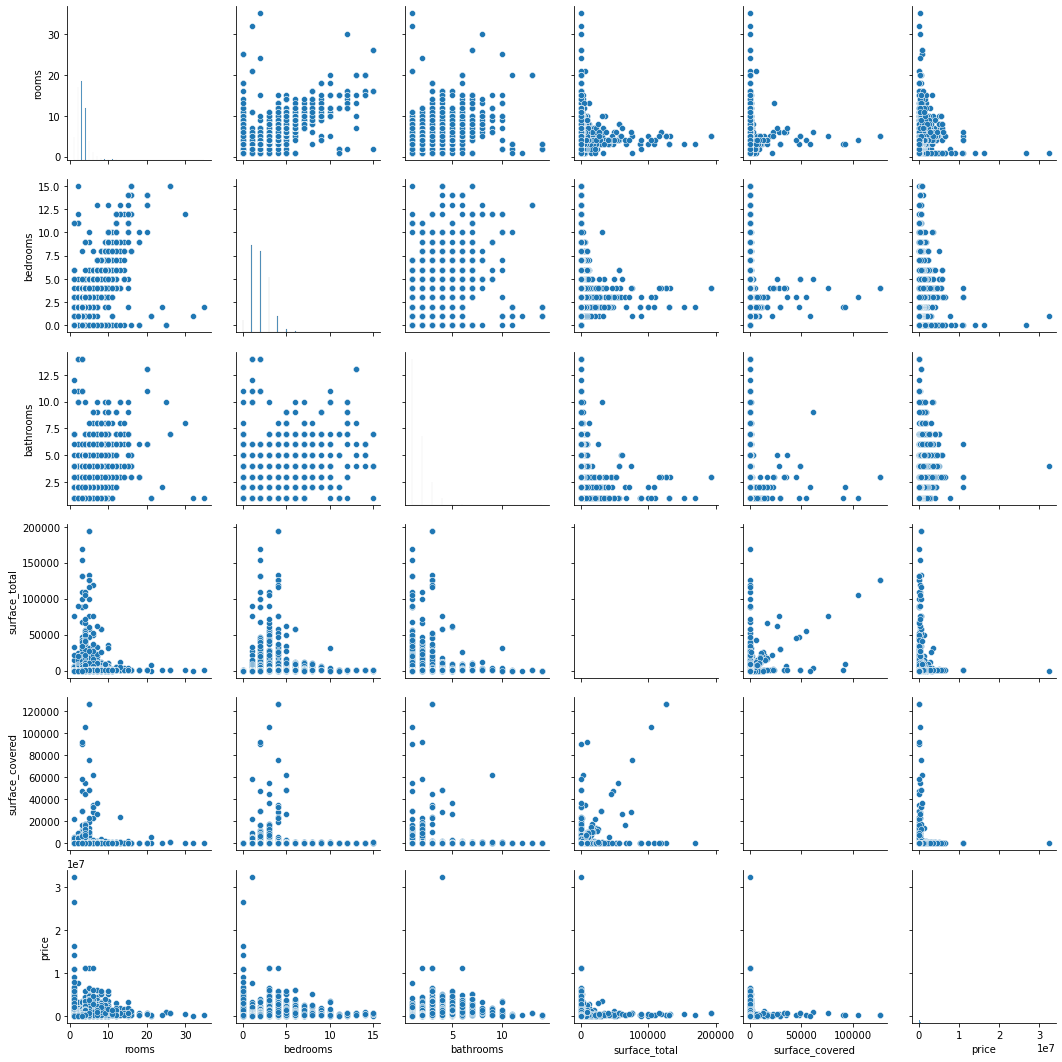

In [6]:
sns.pairplot (df.drop(columns={'lat', 'lon'}))

plt.show()

##### Datos estad√≠sticos generales

In [7]:
df.describe()

lat            lon          rooms       bedrooms  \
count  136735.000000  136701.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304       3.079817       1.983240   
std         0.468428       0.486190       1.416352       1.151304   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.627667     -58.504012       2.000000       1.000000   
50%       -34.600943     -58.443262       3.000000       2.000000   
75%       -34.574600     -58.407586       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  140703.000000  126133.000000    125046.000000  1.466600e+05  
mean        1.599994     216.872888       112.818011  2.412211e+05  
std         0.889324    2037.606649       916.857584  3.185195e+05  
min         1.000000      10.000000         1.000000  5.500000e+03  
25%         1.000000      52.000000        47.000000  1.110000e+05  
50%         1.000000      78.000000        68.000000  1.660000e+05  
75%         2.000000     140.000000       108.000000  2.650000e+05  
max        14.000000  193549.000000    126062.000000  3.243423e+07

##### Primera limpieza
Se eliminar√°n columnas que no ser√°n utilizadas.

In [8]:
df = df.drop(columns={'start_date',
                       'end_date',
                       'created_on',
                       'l1',
                       'currency',
                       'title',
                       'description',
                       'operation_type'})

##### Filtrado de Region y Tipo de Propiedad

A los efectos de poder contrastar mejoras en el rendimiento respecto a lo efectuado en el **Sprint Project 1** se mantendr√° la misma regi√≥n y propiedad usadas en el mismo.
Adem√°s se mantendr√°n los l√≠mites para `surface_total` y `price`.


In [9]:
#Columnas a utilizar
columnas = ["rooms", 
            "bedrooms", 
            "bathrooms", 
            "surface_total", 
            "surface_covered", 
            "price",
            "property_type",
            "l3",
            'lat','lon']

In [10]:
df= df.loc[((df["l2"]== "Capital Federal")&
        (df["property_type"].isin(["PH","Casa","Departamento"]))&
        (df["surface_total"].between(15,1000)) & (df["price"]<= 4000000)),  columnas].dropna().reset_index(drop =True)

In [11]:
df.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
0    7.0       7.0        2.0          140.0            140.0  153000.0   
1    2.0       1.0        2.0           70.0             58.0  159000.0   
2    2.0       1.0        1.0           45.0             45.0  125000.0   
3    2.0       1.0        1.0           85.0             50.0  295000.0   
4    2.0       1.0        1.0           56.0             56.0  150000.0   

  property_type             l3        lat        lon  
0  Departamento  San Cristobal -34.605880 -58.384949  
1            PH          Boedo -34.624056 -58.412110  
2            PH        Palermo -34.593569 -58.427474  
3            PH        Palermo -34.581294 -58.436754  
4            PH   Villa Crespo -34.593779 -58.441239

In [12]:
df.shape

(76771, 10)

---

# Transformaci√≥n de Datos
<a id='transf'></a>

Cargados y r√°pidamente visualizados los datos podemos tener una primera idea para hacer criteriosamente una elecci√≥n de las transformaciones que se deber√°n aplicar.

## a. Elecci√≥n de Transformaciones
<a id='transf_eleccion'></a>

Podemos decir que los "*Big Hero 6*" de la *Ingenier√≠a de Atributos* en el preprocesamiento de datos son:

1. Tratamiento de datos **faltantes**.
2. Detecci√≥n y tratamiento de **Outliers**.
3. **Codificaci√≥n** de variable categ√≥ricas.
4. **Escalado/Normalizaci√≥n** de datos.
5. **Reducci√≥n de Dimensionalidad**.
6. Incorporaci√≥n de **atributos** (**polin√≥micos**).

Buscaremos implementar aqu√≠ de la **1** a la **4**. La **5** y la **6** se incorporar√°n en la secci√≥n [7. Adicional](#Extra).

* Por contar con un *conocimiento previo* del dataset a partir del *sprint project 1*, sabemos que el mismo cuenta con **valores at√≠picos (outliers)** que dificultan  la correcta visualizaci√≥n de las distribuciones y posterior entrenamiento de modelos.
* Nos interesa trabajar sobre las variables **categ√≥ricas** `property_type` y `l3`, que expresan *tipo de propiedad* y *barrio* respectivamente, a fin de encontrar posibles correlaciones con los precios de venta. Aplicaremos para tal fin una **codificaci√≥n** que nos permitir√° utilizarlas en el entrenamiento de nuestros modelos.
* Sabemos tambi√©n que existen distintos *√≥rdenes de magnitud* entre los diferentes atributos del dataset; como por ejemplo, entre `rooms` y `surface_total`, por lo que aplicaremos un **escalado** o **normalizaci√≥n** de los mismos para llevarlos a las mismas magnitudes comparativas.


## b. Implementaci√≥n de Transformaciones
<a id='transf_imple'></a>

### Tratamiento de datos faltantes

Para el tratamiento de los datos faltantes primero veremos la cantidad por atributo a fin de plantear una estrategia acorde para cada caso.

In [13]:
#Usaremos una copia del Dset por si hay que efectuar un rollback
df1= df

In [14]:
#Lo visualizaremos convenientemente como PORCENTAJE del total
print("*** Porcentaje de datos faltantes por atributo: ***")
(df1.isna().sum() / df1.shape[0])*100

*** Porcentaje de datos faltantes por atributo: ***


rooms              0.0
bedrooms           0.0
bathrooms          0.0
surface_total      0.0
surface_covered    0.0
price              0.0
property_type      0.0
l3                 0.0
lat                0.0
lon                0.0
dtype: float64

Podemos observar que el set de datos, bajo las **mismas** condiciones de filtrado implementadas en el **Sprint Project 1** **no** cuenta con valores faltantes en sus instancias.
* No se requiere, entonces, tratamiento alguno de datos faltantes.

### Detecci√≥n y tratamiento de Outliers

Para la detecci√≥n y tratamiento de outliers utilizaremos el **Criterio de los 3 Sigmas**. El mismo se describe de la siguiente manera:

$$ m√≠nimo = ValorMedio - 3 x SD $$

$$ m√°ximo = ValorMedio + 3 x SD $$

* Esto lo hacemos sabiendo por *antecedente* (del *Sprint Project 1*) que los atributos a tratar tienen una **distribuci√≥n normal** (o aproximada).


In [15]:
#Todo valor fuera de los m√°rgenes ser√° convertido a NaN
for col in ['rooms','bedrooms','bathrooms','surface_total','surface_covered']:
  media = df1[col].mean()
  std = df1[col].std()
  outlier = (df1[col] > (media + (2.5*std))) | (df1[col] < (media - (2.5*std)))

  df1.loc[outlier, col] = np.nan

In [16]:
df1.isna().sum()

rooms              1201
bedrooms           1190
bathrooms          2520
surface_total      2449
surface_covered     146
price                 0
property_type         0
l3                    0
lat                   0
lon                   0
dtype: int64

In [17]:
#Imputaci√≥n de valores outliers convertidos a NaN mediante la media
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in ['surface_total','surface_covered']:
    imp.fit(df1[col].values.reshape(-1, 1))
    df1[col]=imp.transform(df1[col].values.reshape(-1, 1))
    
#Imputaci√≥n de valores outliers convertidos a NaN mediante la mediana
imp = SimpleImputer(missing_values=np.nan, strategy='median')
for col in ['rooms','bedrooms','bathrooms']:
    imp.fit(df1[col].values.reshape(-1, 1))
    df1[col]=imp.transform(df1[col].values.reshape(-1, 1))

In [18]:
df1.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
l3                 0
lat                0
lon                0
dtype: int64

##### BoxPlots de atributos filtrados

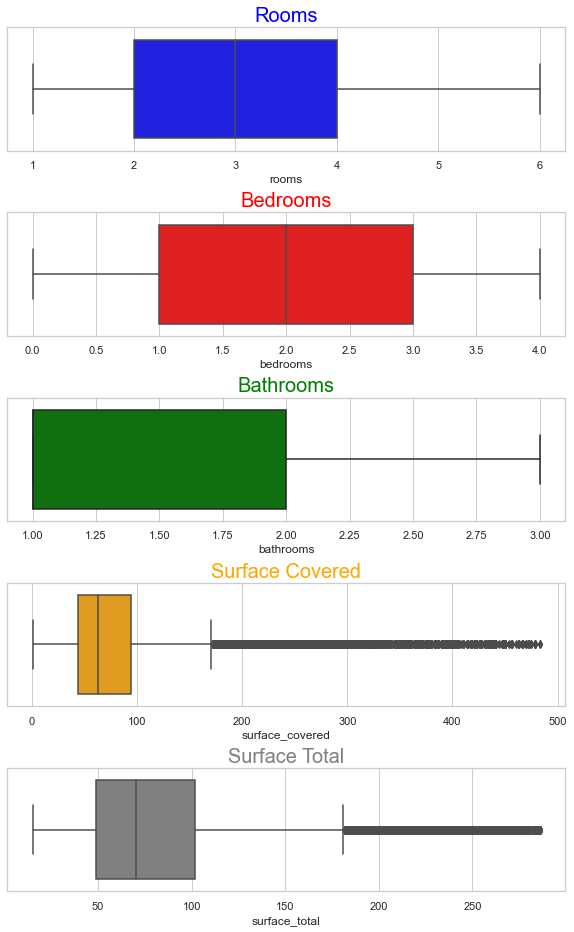

In [19]:
plt.figure(figsize=(10,15))
plt.subplots_adjust(left=0.125
                    , bottom=0.1
                    , right=0.9
                    , top=0.9
                    , wspace=0.2
                    , hspace=0.5)
sns.set(style="whitegrid")

plt.subplot(511)
sns.boxplot(x=df1['rooms'],
           color='blue')
plt.title("Rooms", color='blue',fontsize=20)

plt.subplot(512)
sns.boxplot(x=df1['bedrooms'],
           color='red')
plt.title("Bedrooms", color='red',fontsize=20)

plt.subplot(513)
sns.boxplot(x=df1['bathrooms'],
           color='green')
plt.title("Bathrooms", color='green',fontsize=20)

plt.subplot(514)
sns.boxplot(x=df1['surface_covered'],
           color='orange')
plt.title("Surface Covered", color='orange',fontsize=20)

plt.subplot(515)
sns.boxplot(x=df1['surface_total'],
           color='gray')
plt.title("Surface Total", color='gray',fontsize=20)

plt.show()

### Codificaci√≥n de variable categ√≥ricas
<a id='codificacion'></a>

A continuaci√≥n codificaremos las variables *categ√≥ricas* a fin de poder utilizarlas de manera m√°s efectiva en la alimentaci√≥n de un modelo de ML.

Previo a ello debemos identificar si nuestras variables categ√≥ricas son del tipo **ORDINAL** o **NOMINAL**.
Tenemos entonces:
* `l3` (*barrio*): Nominal, no existe una relaci√≥n de orden.
* `property_type`: Nominal, no existe una relaci√≥n de orden.

In [20]:
#Primero crearemos una copia del dataframe anterior
df2 = df1
#Segundo cambiaremos el nombre de l3' por 'barrio'
df2.rename(columns={'l3':'barrio'}, inplace=True)

Exploremos las variables categ√≥ricas:

In [21]:
# Variable 'barrio'
df2['barrio'].value_counts()

Palermo                 11157
Almagro                  6639
Villa Crespo             5819
Caballito                5528
Belgrano                 5410
Recoleta                 4939
Villa Urquiza            2883
Barrio Norte             2687
Balvanera                2276
Flores                   1948
Nu√±ez                    1777
Puerto Madero            1401
Colegiales               1272
Parque Centenario        1266
Villa Devoto             1249
Villa del Parque         1230
Saavedra                  940
Paternal                  939
San Cristobal             916
San Telmo                 900
Floresta                  811
Boedo                     742
Once                      734
Monserrat                 726
Retiro                    714
Parque Chacabuco          700
Barracas                  662
Villa Pueyrred√≥n          658
Chacarita                 636
San Nicol√°s               629
Las Ca√±itas               601
Liniers                   583
Congreso                  582
Monte 

In [22]:
# Variable 'property_type'
df2['property_type'].value_counts()

Departamento    65329
PH               9334
Casa             2108
Name: property_type, dtype: int64

Para el **tipo de propiedad** se utilizar√° el m√©todo **One-Hot** dado que se trata √∫nicamente de 3 tipos de variables.

In [23]:
df2 = pd.concat([df2,pd.get_dummies(df2["property_type"]).reset_index(drop= True)],
               axis=1)

In [24]:
df2.drop(columns='property_type',inplace=True)

In [25]:
df2.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
0    3.0       2.0        2.0          140.0            140.0  153000.0   
1    2.0       1.0        2.0           70.0             58.0  159000.0   
2    2.0       1.0        1.0           45.0             45.0  125000.0   
3    2.0       1.0        1.0           85.0             50.0  295000.0   
4    2.0       1.0        1.0           56.0             56.0  150000.0   

          barrio        lat        lon  Casa  Departamento  PH  
0  San Cristobal -34.605880 -58.384949     0             1   0  
1          Boedo -34.624056 -58.412110     0             0   1  
2        Palermo -34.593569 -58.427474     0             0   1  
3        Palermo -34.581294 -58.436754     0             0   1  
4   Villa Crespo -34.593779 -58.441239     0             0   1

Para los barrios los dividiremos en grupos seg√∫n el **valor del m^2**.
* Calcularemos el valor de metro cuadrado promedio por barrio y luego los agruparemos seg√∫n ese valor.

In [26]:
df2["precio_m2"] =  df2.price /  df2.surface_total
df2.dropna(inplace= True)
df2.describe(percentiles=[0.05, 0.1, 0.5, 0.9, 0.95])

rooms      bedrooms     bathrooms  surface_total  \
count  76771.000000  76771.000000  76771.000000   76771.000000   
mean       2.925375      1.938102      1.426632      84.630567   
std        1.115614      0.912120      0.639394      49.746988   
min        1.000000      0.000000      1.000000      15.000000   
5%         1.000000      1.000000      1.000000      34.000000   
10%        2.000000      1.000000      1.000000      39.000000   
50%        3.000000      2.000000      1.000000      70.000000   
90%        4.000000      3.000000      2.000000     155.000000   
95%        5.000000      4.000000      3.000000     193.000000   
max        6.000000      4.000000      3.000000     286.000000   

       surface_covered         price           lat           lon  \
count     76771.000000  7.677100e+04  76771.000000  76771.000000   
mean         80.967491  2.563026e+05    -34.598313    -58.434841   
std          58.497010  2.864284e+05      0.023385      0.035734   
min           1.000000  6.000000e+03    -34.696419    -58.530468   
5%           32.000000  8.000000e+04    -34.636974    -58.500240   
10%          36.000000  9.250000e+04    -34.627870    -58.485358   
50%          63.000000  1.780000e+05    -34.598703    -58.432771   
90%         149.000000  4.500000e+05    -34.566206    -58.388511   
95%         197.000000  6.800000e+05    -34.557705    -58.378138   
max         483.000000  4.000000e+06    -34.535909    -58.353930   

               Casa  Departamento            PH     precio_m2  
count  76771.000000  76771.000000  76771.000000  76771.000000  
mean       0.027458      0.850959      0.121582   3023.492045  
std        0.163416      0.356131      0.326805   2622.747499  
min        0.000000      0.000000      0.000000     21.818182  
5%         0.000000      0.000000      0.000000   1423.076923  
10%        0.000000      0.000000      0.000000   1709.090909  
50%        0.000000      1.000000      0.000000   2600.000000  
90%        0.000000      1.000000      1.000000   4051.282051  
95%        0.000000      1.000000      1.000000   5269.662921  
max        1.000000      1.000000      1.000000  58333.333333

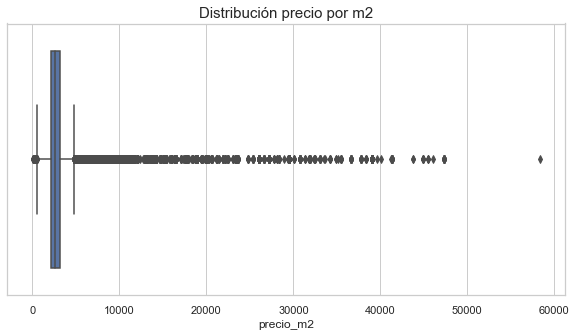

In [27]:
# Veamos la distribuci√≥n de la columna
plt.figure(figsize=(10,5))
sns.boxplot(x=df2['precio_m2'])
plt.title("Distribuci√≥n precio por m2", fontsize=15)
plt.show()

Se pueden observar algunos valores at√≠picos, asi que recortaremos entre el 10% y el 90% de los quintiles.

In [28]:
df2 = df2.loc[(df2.precio_m2 > df2.precio_m2.quantile(0.1)) & (df2.precio_m2 < df2.precio_m2.quantile(0.9)), :].reset_index(drop=True)

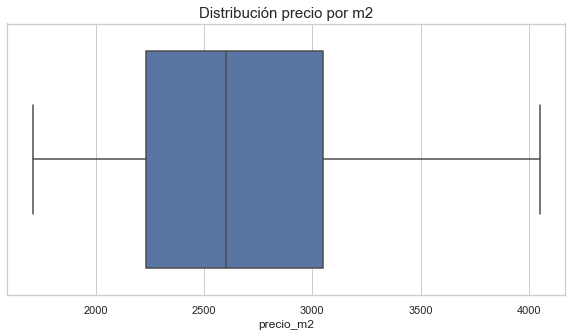

In [29]:
# Veamos la nueva distribucion
plt.figure(figsize=(10,5))
sns.boxplot(x=df2['precio_m2'])
plt.title("Distribuci√≥n precio por m2", fontsize=15)
plt.show()

In [30]:
df2.shape

(61386, 13)

Con el dataset preparado tomaremos el precio **promedio** por barrio.

In [31]:
union=df2.groupby(['barrio'])['precio_m2'].agg(['mean'])
df2.merge(union,
          how= "left",
          left_on="barrio", 
          right_on="barrio")

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
0        2.0       1.0        2.0           70.0             58.0  159000.0   
1        2.0       1.0        1.0           45.0             45.0  125000.0   
2        2.0       1.0        1.0           85.0             50.0  295000.0   
3        2.0       1.0        1.0           56.0             56.0  150000.0   
4        2.0       1.0        1.0           70.0             70.0  159500.0   
...      ...       ...        ...            ...              ...       ...   
61381    3.0       2.0        1.0           84.0             84.0  178000.0   
61382    4.0       2.0        3.0          159.0             98.0  539000.0   
61383    4.0       3.0        3.0          175.0            111.0  570000.0   
61384    3.0       2.0        2.0          144.0            134.0  480000.0   
61385    3.0       2.0        2.0          145.0            145.0  420000.0   

             barrio        lat        lon  Casa  Departamento  PH  \
0             Boedo -34.624056 -58.412110     0             0   1   
1           Palermo -34.593569 -58.427474     0             0   1   
2           Palermo -34.581294 -58.436754     0             0   1   
3      Villa Crespo -34.593779 -58.441239     0             0   1   
4      Villa Crespo -34.600988 -58.433061     0             0   1   
...             ...        ...        ...   ...           ...  ..   
61381       Palermo -34.576573 -58.434394     0             0   1   
61382       Palermo -34.581699 -58.433547     0             1   0   
61383       Palermo -34.585355 -58.427194     0             0   1   
61384       Palermo -34.585355 -58.427194     0             0   1   
61385       Palermo -34.583995 -58.417645     0             1   0   

         precio_m2         mean  
0      2271.428571  2333.780998  
1      2777.777778  3021.560856  
2      3470.588235  3021.560856  
3      2678.571429  2484.324719  
4      2278.571429  2484.324719  
...            ...          ...  
61381  2119.047619  3021.560856  
61382  3389.937107  3021.560856  
61383  3257.142857  3021.560856  
61384  3333.333333  3021.560856  
61385  2896.551724  3021.560856  

[61386 rows x 14 columns]

Hecho esto lo dividiremos y agruparemos los barrios en quintiles de a **20%** seg√∫n su precio por metro cuadrado *promedio*:

In [32]:
df2["categoria_barrio"]  = pd.qcut(df2.precio_m2, 5)

In [33]:
df2.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
0    2.0       1.0        2.0           70.0             58.0  159000.0   
1    2.0       1.0        1.0           45.0             45.0  125000.0   
2    2.0       1.0        1.0           85.0             50.0  295000.0   
3    2.0       1.0        1.0           56.0             56.0  150000.0   
4    2.0       1.0        1.0           70.0             70.0  159500.0   

         barrio        lat        lon  Casa  Departamento  PH    precio_m2  \
0         Boedo -34.624056 -58.412110     0             0   1  2271.428571   
1       Palermo -34.593569 -58.427474     0             0   1  2777.777778   
2       Palermo -34.581294 -58.436754     0             0   1  3470.588235   
3  Villa Crespo -34.593779 -58.441239     0             0   1  2678.571429   
4  Villa Crespo -34.600988 -58.433061     0             0   1  2278.571429   

       categoria_barrio  
0   (2142.857, 2450.98]  
1  (2758.621, 3170.732]  
2  (3170.732, 4050.725]  
3   (2450.98, 2758.621]  
4   (2142.857, 2450.98]

Con esto asignaremos una categor√≠a seg√∫n el grupo donde caiga:

In [34]:
df2["categoria_barrio"].unique()

[(2142.857, 2450.98], (2758.621, 3170.732], (3170.732, 4050.725], (2450.98, 2758.621], (1709.21, 2142.857]]
Categories (5, interval[float64]): [(1709.21, 2142.857] < (2142.857, 2450.98] < (2450.98, 2758.621] < (2758.621, 3170.732] < (3170.732, 4050.725]]

In [35]:
df2["categoria_barrio"] = pd.cut(df2.precio_m2, 
       bins=[1709.21, 2143, 2451, 2759, 3171, 4051],
       labels= ["cat_1", "cat_2","cat_3","cat_4","cat_5"])

In [36]:
df2.drop(columns={'precio_m2','barrio'},inplace=True)
df2.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
0    2.0       1.0        2.0           70.0             58.0  159000.0   
1    2.0       1.0        1.0           45.0             45.0  125000.0   
2    2.0       1.0        1.0           85.0             50.0  295000.0   
3    2.0       1.0        1.0           56.0             56.0  150000.0   
4    2.0       1.0        1.0           70.0             70.0  159500.0   

         lat        lon  Casa  Departamento  PH categoria_barrio  
0 -34.624056 -58.412110     0             0   1            cat_2  
1 -34.593569 -58.427474     0             0   1            cat_4  
2 -34.581294 -58.436754     0             0   1            cat_5  
3 -34.593779 -58.441239     0             0   1            cat_3  
4 -34.600988 -58.433061     0             0   1            cat_2

Ahora s√≠, con los barrios divididos por categor√≠as segun su precio promedio de m^2 procedemos a **codificar** el atributo:

In [37]:
df2 = pd.concat([df2,pd.get_dummies(df2["categoria_barrio"]).reset_index(drop= True)],
               axis=1)
df2.drop(columns='categoria_barrio', inplace=True)
df2.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
0    2.0       1.0        2.0           70.0             58.0  159000.0   
1    2.0       1.0        1.0           45.0             45.0  125000.0   
2    2.0       1.0        1.0           85.0             50.0  295000.0   
3    2.0       1.0        1.0           56.0             56.0  150000.0   
4    2.0       1.0        1.0           70.0             70.0  159500.0   

         lat        lon  Casa  Departamento  PH  cat_1  cat_2  cat_3  cat_4  \
0 -34.624056 -58.412110     0             0   1      0      1      0      0   
1 -34.593569 -58.427474     0             0   1      0      0      0      1   
2 -34.581294 -58.436754     0             0   1      0      0      0      0   
3 -34.593779 -58.441239     0             0   1      0      0      1      0   
4 -34.600988 -58.433061     0             0   1      0      1      0      0   

   cat_5  
0      0  
1      0  
2      1  
3      0  
4      0

### Escalado/Normalizaci√≥n de datos

Por √∫ltimo efectuaremos una normalizaci√≥n de los datos para llevar todos los √≥rdenes de magnitud a la misma escala comparativa.

Para llevar a cabo esta tarea utilizaremos `StandarScaler` de la librer√≠a `sklearn`.

In [38]:
#Primero crearemos una copia nueva en caso de necesitar un roll-back
df3 = df2

In [39]:
#Instanciamos, entrenamos y escalamos
ss = StandardScaler()
for col in ['rooms','bedrooms','bathrooms','surface_total','surface_covered','lat','lon']:
    ss.fit(df3[[col]])
    df3[col] = ss.transform(df3[[col]])
    

In [40]:
df3.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
0 -0.761241 -0.965313   1.024728      -0.169676        -0.300281  159000.0   
1 -0.761241 -0.965313  -0.632209      -0.742284        -0.613776  125000.0   
2 -0.761241 -0.965313  -0.632209       0.173889        -0.493201  295000.0   
3 -0.761241 -0.965313  -0.632209      -0.490337        -0.348511  150000.0   
4 -0.761241 -0.965313  -0.632209      -0.169676        -0.010901  159500.0   

        lat       lon  Casa  Departamento  PH  cat_1  cat_2  cat_3  cat_4  \
0 -1.258324  0.706514     0             0   1      0      1      0      0   
1  0.155250  0.248688     0             0   1      0      0      0      1   
2  0.724401 -0.027850     0             0   1      0      0      0      0   
3  0.145510 -0.161492     0             0   1      0      0      1      0   
4 -0.188753  0.082187     0             0   1      0      1      0      0   

   cat_5  
0      0  
1      0  
2      1  
3      0  
4      0

##### Distribuciones estandarizadas

Veamos c√≥mo quedaron las distribuciones de los atributos estandarizados:

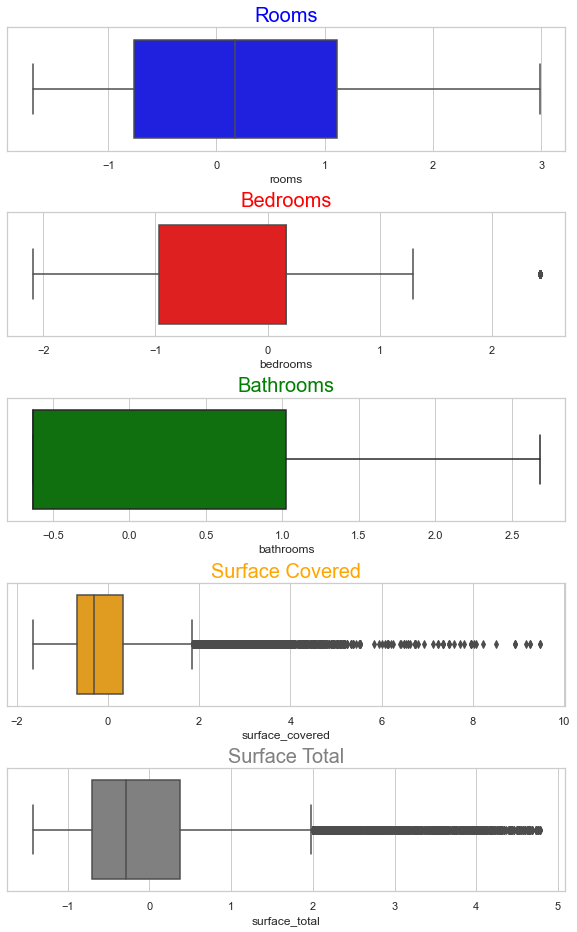

In [41]:
plt.figure(figsize=(10,15))
plt.subplots_adjust(left=0.125
                    , bottom=0.1
                    , right=0.9
                    , top=0.9
                    , wspace=0.2
                    , hspace=0.5)
sns.set(style="whitegrid")

plt.subplot(511)
sns.boxplot(x=df3['rooms'],
           color='blue')
plt.title("Rooms", color='blue',fontsize=20)

plt.subplot(512)
sns.boxplot(x=df3['bedrooms'],
           color='red')
plt.title("Bedrooms", color='red',fontsize=20)

plt.subplot(513)
sns.boxplot(x=df3['bathrooms'],
           color='green')
plt.title("Bathrooms", color='green',fontsize=20)

plt.subplot(514)
sns.boxplot(x=df3['surface_covered'],
           color='orange')
plt.title("Surface Covered", color='orange',fontsize=20)

plt.subplot(515)
sns.boxplot(x=df3['surface_total'],
           color='gray')
plt.title("Surface Total", color='gray',fontsize=20)

plt.show()

##### Matriz de correlaci√≥n
Para terminar con el preprocesamiento de datos veamos c√≥mo qued√≥ la matriz de correlaciones:

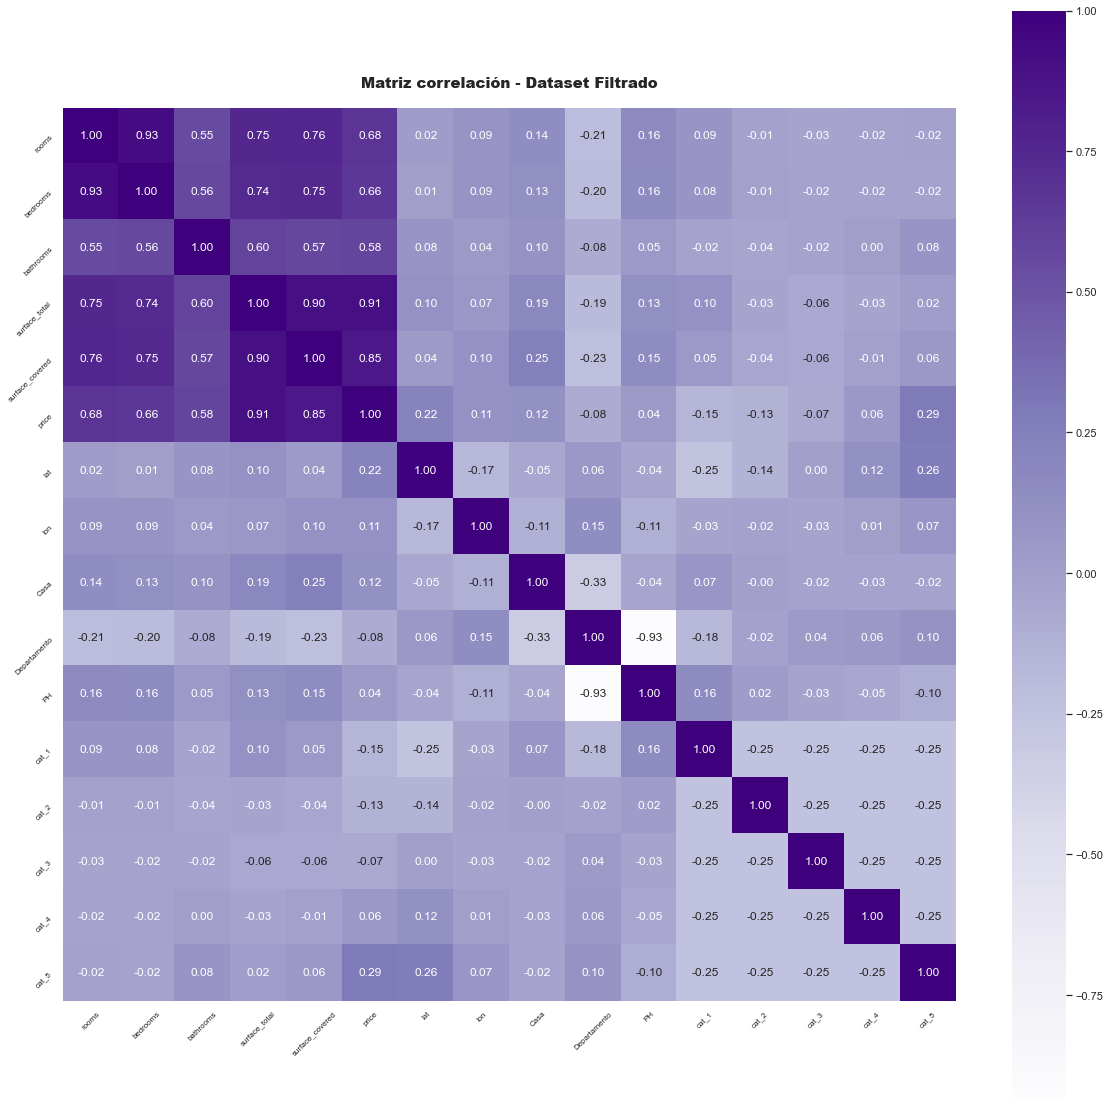

In [42]:
corr_df3 = df3.corr() #Creamos la matriz de correlaci√≥n

plt.figure(figsize=(20,20))#Tama√±o de gr√°fico                                                     

sns.heatmap(corr_df3   #Mapa de calor hecho a partir de la matriz de correlaci√≥n
            , cbar = True
            , square = True
            , annot=True
            , fmt= '.2f'
            #, annot_kws={'size': 15}
            , cmap= 'Purples')

plt.xticks(rotation = 45, fontsize = 8)      #Etiquetas a 45 grados
plt.yticks(rotation = 45, fontsize = 8)

plt.title ("Matriz correlaci√≥n - Dataset Filtrado"       #T√≠tulo del gr√°fico
          ,fontsize = 15
          ,fontweight = 'black'
          ,pad = 20)

plt.show()

## c. ML - Reentrenamiento de √Årbol de Decisi√≥n
<a id='reentre'></a>

Para el **Sprint Project 1** se utiliz√≥ de *benchmark* un modelo de **√°rbol de decisi√≥n** de **profundidad = 1** cuyos valores de evaluaci√≥n dieron:
<table>
  <tr>
    <th>Tipo de Modelo</th>
    <th>Hiper-par√°metros</th>
    <th>Variables X</th>
    <th>RMSE (test)</th>
    <th>Overfiting</th>
  </tr>
  <tr>
    <td>Benchmark</td>
    <td>Profundidad = 1</td>
    <td>2</td>
    <td>~230258</td>
    <td>No</td>
  </tr>
 </table>

Reentrenaremos este mismo modelo y observaremos su nuevo desempe√±o.
* Cabe aclarar, como mencionamos al principio, que para el **Sprint Project 1** se utilizaron *√∫nicamente* los tipos de propiedad "*PH*", "*Casa*" y "*Departamento*" de la region de *Capital Federal*.

In [43]:
#1. Variables predictoras y variable a predecir
X = df3.drop(columns='price')
y = df3['price']
#2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [44]:
#3. Instanciamos el modelo
tree_bm = DecisionTreeRegressor(max_depth = 1)
#4. Entrenamos
tree_bm.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [45]:
#5. Predecimos y guardamos resultados
y_test_pred = tree_bm.predict(X_test)
y_train_pred = tree_bm.predict(X_train)

### Evaluaci√≥n de Desempe√±o

In [46]:
#6. Evaluamos el modelo
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))               #Obtenemos la raiz cuadrada del MSE y lo guardamos
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print ("\n üïµÔ∏è RA√çCES DEL ERROR CUADR√ÅTICO PROMEDIO:\n")
print("üõÜConjunto de ENTRENAMIENTO: ", rmse_train)
print("üõÜConjunto de TESTEO: ", rmse_test)


 üïµÔ∏è RA√çCES DEL ERROR CUADR√ÅTICO PROMEDIO:

üõÜConjunto de ENTRENAMIENTO:  86492.71248824667
üõÜConjunto de TESTEO:  86264.01979201753


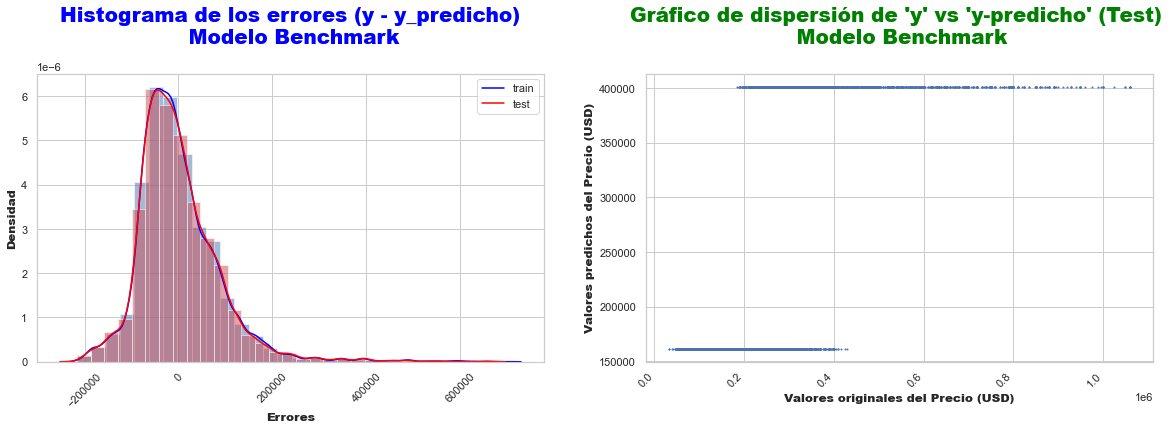

In [47]:
# 7. Distribuci√≥n de errores

plt.figure (figsize= (20,5)) 
plt.subplots_adjust(left=0.125
                    , bottom=0.1
                    , right=0.9
                    , top=0.9
                    , wspace=0.2
                    , hspace=0.5)

## GR√ÅFICO DE HISTOGRAMA ##

plt.subplot(121)

plt.hist(y_train - y_train_pred,
         bins = 30,
         alpha=0.5,
         density=True,
         color= 'b')
plt.hist(y_test - y_test_pred,
         bins = 30,
         alpha=0.5,
         density=True,
         color= 'r')

sns.kdeplot(y_train - y_train_pred,
             label = 'train',
             color='blue',
             alpha=0.3)
sns.kdeplot(y_test - y_test_pred,
             label = 'test',
             color='red',
             alpha=0.3)

# Etiquetas de ejes y t√≠tulo

plt.title ("Histograma de los errores (y - y_predicho)\n Modelo Benchmark"   #T√≠tulo del gr√°fico
          ,fontsize = 20
          ,fontweight = 'black'
          ,color= 'blue'
          ,pad = 30)

plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)

plt.ylabel("Densidad", fontweight = "black", fontsize = 12)
plt.legend()


## GR√ÅFICO DE DISPERSI√ìN ##


plt.subplot(122)

plt.scatter(y_test, y_test_pred, s=1) 

# Etiquetas de ejes y t√≠tulo
plt.title ("Gr√°fico de dispersi√≥n de 'y' vs 'y-predicho' (Test) \n Modelo Benchmark"   #T√≠tulo del gr√°fico
           ,fontsize = 20
           ,fontweight = 'black'
           ,color= 'green'
           ,pad = 30)
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)

plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)

plt.show()

### Observaciones

Realmente se ve una **mejora significativa** respecto al modelo del **Sprint Project 1**. Podemos notar la diferencia que hace el preprocesamiento de los datos en el desempe√±o final de los modelos alimentados con ellos.
Estos valores pueden ser mejorados a√∫n mas ya que:
* Se puede optimizar el modelo.
* Se pueden elegir modelos de predicci√≥n m√°s avanzados.
* Se pueden aplicar t√©cnicas avanzadas de preprocesamiento, como *Reducci√≥n de Dimensionalidad* y *Atributos Polin√≥micos*.

---

# Modelos Avanzados
<a id='ML_Adv'></a>

## Elecci√≥n de Modelos
<a id='ML_Adv_elec'></a>

Para la implementaci√≥n de modelos avanzados se aplicar√°n:
1. **Regresi√≥n** con **regularizaci√≥n Lasso**
2. **Ensamble** del tipo **Random Forest Regressor**.

**NOTA:** Los atributos polin√≥micos ser√°n adicionados en la secci√≥n [7.1 Nuevas Transformaciones](#extra_tranf_data).


### Modelo 1: Regularizaci√≥n Lasso

Se eligi√≥ la regularizaci√≥n **Lasso** por sobre la *Ridge* ya que la misma "castiga" los atributos menos importantes **llev√°ndolos a cero**.

In [48]:
#1. Instanciamos un modelo de Reg.Lasso
reg_lasso = Lasso(alpha = 1, #Elegimos 1 para probar, luego optimizaremos
                  max_iter=1000,
                  tol=0.0001,                  
                  normalize=True) 

In [49]:
#2. Entrenamos
reg_lasso.fit(X_train,y_train)

Lasso(alpha=1, normalize=True)

#### Evaluaci√≥n

Ra√≠z del error cuadr√°tico medio en Train: 28776.092951916657
Ra√≠z del error cuadr√°tico medio en Test: 28769.229844304704


d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


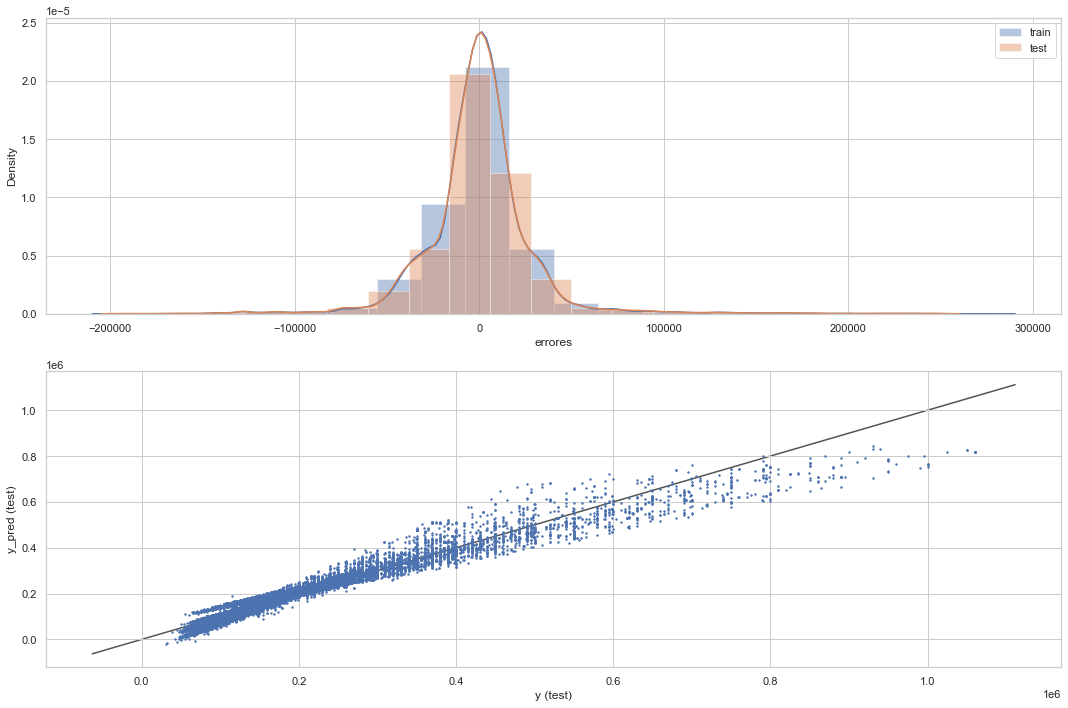

In [50]:
#5. Evaluamos el modelo mediante la funci√≥n definida
evaluar_regresion(reg_lasso, X_train, X_test, y_train, y_test)

Podemos notar que:
* Los puntos tienen un agrupamiento tendiente a la regresi√≥n lineal.
* Se redujo *considerablemente* el error con respeco al modelo **benchmark**.
* No parece existir un **sobreajuste** notable por parte del modelo.

De todas maneras, en la secci√≥n [4.2](#ML_Adv_opti) nos encargaremos de la optimizaci√≥n de los hiperpar√°metros del mismo.

### Modelo 2: Random Forest Regressor

Para este segundo modelo regresor se seleccion√≥ un **ensamble** del tipo **bosque aleatorio**.

In [51]:
# 1. Instanciamos el modelo (par√°metros base)
rnd_forest = RandomForestRegressor()
# En la siguiente secci√≥n ser√°n optimizados

In [52]:
# 2. Entrenamos
rnd_forest.fit(X_train, y_train)

RandomForestRegressor()

#### Evaluaci√≥n

Ra√≠z del error cuadr√°tico medio en Train: 4651.926479241986
Ra√≠z del error cuadr√°tico medio en Test: 9863.965337761952


d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


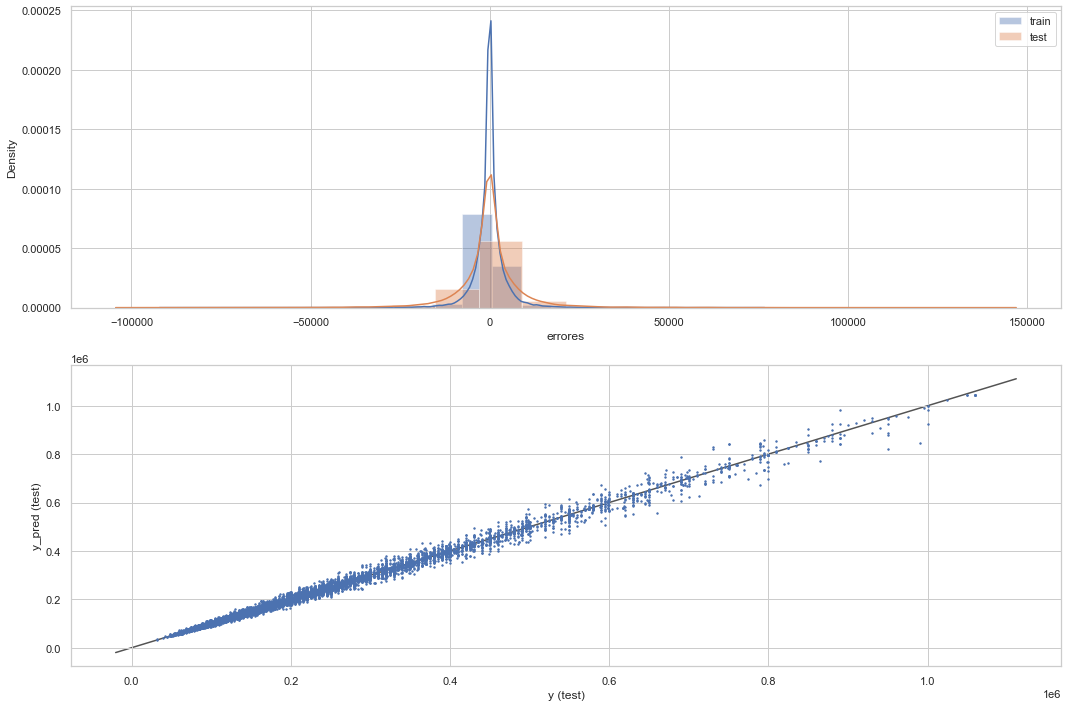

In [53]:
#3. Evaluamos el modelo mediante la funci√≥n definida
evaluar_regresion(rnd_forest, X_train, X_test, y_train, y_test)

##### Ranking de importancia de atributos en el modelo

In [54]:
pd.DataFrame({'feature':X_train.columns, 'importancia': rnd_forest.feature_importances_}).sort_values('importancia', ascending=False)

feature  importancia
3     surface_total     0.819878
14            cat_5     0.105260
10            cat_1     0.032494
13            cat_4     0.018465
4   surface_covered     0.013098
5               lat     0.002679
11            cat_2     0.002531
6               lon     0.002449
12            cat_3     0.001821
2         bathrooms     0.000418
0             rooms     0.000390
1          bedrooms     0.000331
9                PH     0.000086
8      Departamento     0.000069
7              Casa     0.000029

Observando la evaluaci√≥n notamos que:
* El modelo mejora incre√≠blemente con respecto al *benchmark*.
* Su RMSE es el menor de los modelos enternados hasta aqu√≠.
* Sin embargo, si observamos los RMSE `test` vs `train` podemos notar que una diferencia que lleva a pensar que el mismo est√° **sobreajustando**.

Al igual que el modelo de Lassio, en la secci√≥n [4.2](#ML_Adv_opti) nos encargaremos de la optimizaci√≥n de los hiperpar√°metros.

## Optimizaci√≥n de Hiperpar√°metros
<a id='ML_Adv_opti'></a>

En esta secci√≥n se tomar√°n los dos modelos elegidos en [4. Modelos Avanzados](#ML_Adv) para buscar **optimizarlos**.
Para ello se eligieron las dos siguiente t√©cnicas:
* **Validaci√≥n Cruzada**: es un proceso similar al *train-test*, donde se eval√∫a y valida mediante el entrenamiento de varios modelos con **subconjuntos** de los datos de entrada disponibles y su **evaluaci√≥n** en el subconjunto complementario de los datos.
* **Random-Search**: se decidi√≥ por sobre *grid-search* ya que el espacio de combinaciones se explora de manera m√°s eficiente, beneficiando a los hiperpar√°metros m√°s importantes.

### Random Search con CV

#### RS-CV Regularizaci√≥n Lasso


In [55]:
#1. Definimos una lista de los par√°metros a probar/optimizar
param_lasso = {'alpha':uniform()}

In [56]:
#2. Efectuamos el Random Search (Incluye CV)
lasso_CV = RandomizedSearchCV(estimator=reg_lasso,
                              param_distributions=param_lasso,
                              n_iter=100,
                              random_state=42, cv=5)

In [57]:
#3. Entrenamos el nuevo modelo
lasso_CV.fit(X_train, y_train)

d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130876371147.59766, tolerance: 55085012372.118706
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131426178195.5664, tolerance: 55229978972.15579
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131319596437.44531, tolerance: 55049946513.9216
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascienc

d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136999354664.80469, tolerance: 55229978972.15579
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136865638596.28906, tolerance: 55049946513.9216
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137684216471.85938, tolerance: 55131763169.06778
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascienc

d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141113985427.83203, tolerance: 55049946513.9216
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141933628055.64453, tolerance: 55131763169.06778
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139158115296.63672, tolerance: 54629469893.88063
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascienc

RandomizedSearchCV(cv=5, estimator=Lasso(alpha=1, normalize=True), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023B83DE7700>},
                   random_state=42)

d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Ra√≠z del error cuadr√°tico medio en Train: 28749.742708338657
Ra√≠z del error cuadr√°tico medio en Test: 28743.44669195473


d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


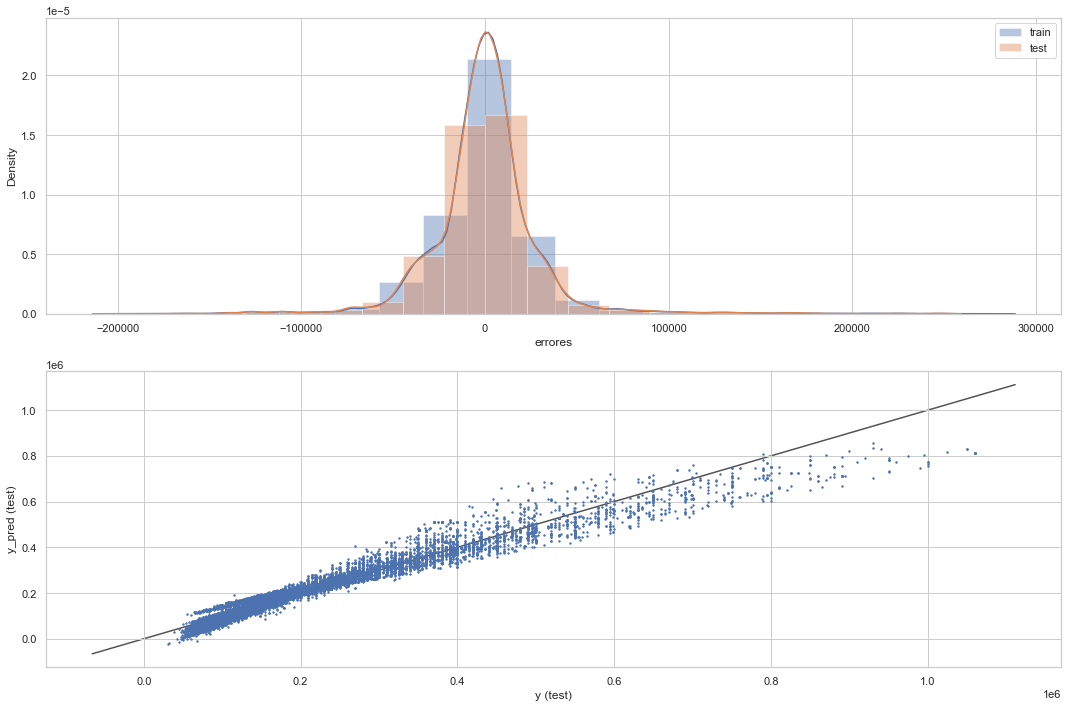

In [58]:
#5. Probemos entonces ahora predecir en los datos del test
evaluar_regresion(lasso_CV, X_train, X_test, y_train, y_test)

**Observaciones**:
* Podemos ver que el valor √≥ptimo de hiperpar√°metro hallado para el modelo fue:
    * Alpha = 0.005522117123602399
* Respecto a la evaluaci√≥n observamos que no hubieron practicamente mejoras respecto al modelo original.

Analicemos para este √∫ltimo punto el valor de los coeficientes tanto **antes** como **despu√©s** de la optimizaci√≥n:

In [59]:
#Coeficientes antes y despu√©s de la optimizaci√≥n
print("Coeficientes ANTES de optimizaci√≥n:\n")
print(reg_lasso.coef_)
print("\n Coeficientes DESPU√âS de optimizaci√≥n:\n")
print(lasso_CV.best_estimator_.coef_)

Coeficientes ANTES de optimizaci√≥n:

[ 1.50800959e+03 -2.23044806e+03  3.07897246e+00  1.07498665e+05
  1.21239429e+04  0.00000000e+00  1.16719756e+03 -3.30597129e+04
  9.94546214e+03 -0.00000000e+00 -5.57428185e+04 -2.14729851e+04
 -0.00000000e+00  2.44047319e+04  7.05814238e+04]

 Coeficientes DESPU√âS de optimizaci√≥n:

[ 4.08468124e+03 -5.21058410e+03  2.00718444e+02  1.07729285e+05
  1.23659445e+04 -1.58914702e+02  1.25532274e+03 -3.53554088e+04
  1.02417299e+04 -8.55436945e+01 -8.64918755e+04 -5.21576075e+04
 -3.02700249e+04 -5.48669684e+03  4.06091500e+04]


Se puede observar que con la optimizaci√≥n se castiga menos a los valores de menor importancia, sin embargo el desempe√±o no ve una mejora reflejada. Esto se puede deber a que necesitemos aplicar otras t√©cnicas en el **preprocesamiento** para mejorar el entrenamiento.
* Se abordar√° este tema en la secci√≥n [7.1 Nuevas Transformaciones](#extra_tranf_data) al buscar agregar nuevos **atributos polin√≥micos**.

#### RS-CV Random Forest Regressor

In [60]:
#1. Definimos una lista de los par√°metros a probar

# N√∫mero de √°rboles en el bosque
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Cantidad de atributos a considerar por particion
max_features = ['auto']
# M√°xima profundidad de √°rboles
max_depth = [int(x) for x in np.linspace(5, 110, num = 11)]
max_depth.append(None)

# Creamos la lista

param_rnd_forest = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth}

In [61]:
#2. Efectuamos el Random Search (Incluye CV)
rnd_forest_CV = RandomizedSearchCV(estimator= rnd_forest,
                                   param_distributions= param_rnd_forest,
                                   n_iter=10,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   scoring    = 'neg_root_mean_squared_error',
                                   return_train_score = True,
                                   n_jobs= -1)

In [62]:
#3. Entrenamos el nuevo modelo
rnd_forest_CV.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 15, 26, 36, 47, 57, 68,
                                                      78, 89, 99, 110, None],
                                        'max_features': ['auto'],
                                        'n_estimators': [50, 155, 261, 366, 472,
                                                         577, 683, 788, 894,
                                                         1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=2)

In [63]:
#4. Veamos los resultados obtenidos
print("Mejores parametros: "+str(rnd_forest_CV.best_params_))
print("Mejor Score: "+str(rnd_forest_CV.best_score_)+'\n')

Mejores parametros: {'n_estimators': 683, 'max_features': 'auto', 'max_depth': 26}
Mejor Score: -10442.869006836143



Ra√≠z del error cuadr√°tico medio en Train: 4608.619192552013
Ra√≠z del error cuadr√°tico medio en Test: 9819.595486216382


d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


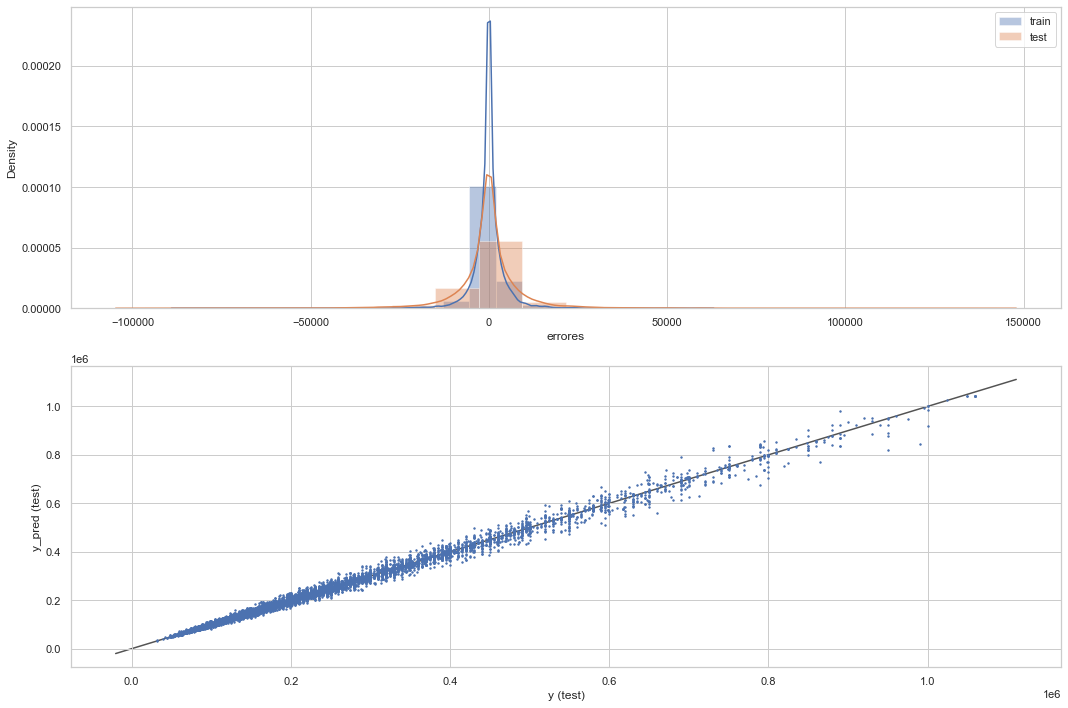

In [64]:
#5. Probemos entonces ahora predecir en los datos del test
evaluar_regresion(rnd_forest_CV, X_train, X_test, y_train, y_test)

Vemos que con los "mejores" par√°metros elegidos por la Random-Search el modelo sigue **sobreajustado**.

Para solucionar esto veamos la tabla de estimadores:

In [65]:
#Agregaremos una columna para ver la diferencia enter RMSE train-test
estim_rnd_forest_CV=pd.DataFrame(rnd_forest_CV.cv_results_)
estim_rnd_forest_CV["DIF_train_test"] = estim_rnd_forest_CV["mean_train_score"] - estim_rnd_forest_CV["mean_test_score"]
#Ordenamos de mayor a menor
estim_rnd_forest_CV=estim_rnd_forest_CV.sort_values('DIF_train_test', ascending = True)

Tenemos entonces que el estimador que presenta **menos sobreajuste** y, por lo tanto el que eligiremos, es:

In [66]:
estim_rnd_forest_CV[{'param_n_estimators','param_max_features','param_max_depth'}].head(1)

param_n_estimators param_max_features param_max_depth
2                472               auto               5

In [67]:
# Entrenamos el modelos con dichos ajustes
nuevo_rnd_forest= RandomForestRegressor(n_estimators=472,
                                        max_depth=5,
                                        max_features='auto')
nuevo_rnd_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=472)

Ra√≠z del error cuadr√°tico medio en Train: 23458.255759045696
Ra√≠z del error cuadr√°tico medio en Test: 23689.336765103846


d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


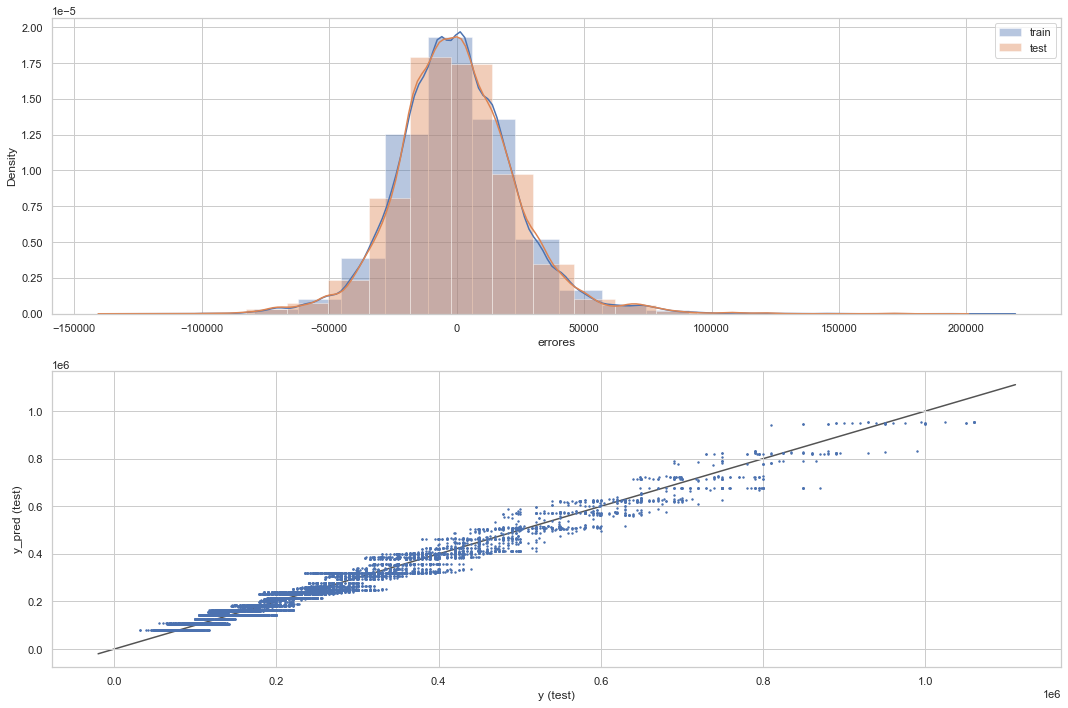

In [68]:
#Evaluamos el nuevo modelo
evaluar_regresion(nuevo_rnd_forest, X_train, X_test, y_train, y_test)

**Observaciones**:
* Si bien los par√°metros encontrados por la *Random-Search* disminuyeron *considerablemente* el error, dicho modelo segu√≠ **sobreajustando**.
* El nuevo modelo tiene mayor **RMSE** pero **no** sobreajusta. Adem√°s, as√≠ y todo mejora con respecto a la regresion Lasso.
* Podemos ver entonces que los hiperpar√°metros √≥ptimos hallados para el modelo son:
    * n_estimators = *472*
    * max_features = *auto*
    * max_depth = *5*

## Comparaci√≥n de Desempe√±os
<a id='ML_Adv_compa'></a>

La siguiente tabla resumir√° los valores obtenidos de los 5 modelos de ML a fin de poder comparlos entre si:

<table>
  <tr>
    <th>Modelo</th>
    <th>Hiperpar√°metros</th>
    <th>RMSE train</th>
    <th>RMSE test</th>
    <th>Overfitting?</th>
  </tr>
  <tr>
    <td>Benchmark</td>
    <td>Profundidad = 1</td>
    <td>~86492</td>
    <td>~86264</td>
    <td>No</td>
  </tr>
  <tr>
    <td>Lasso</td>
    <td>alpha = 1</td>
    <td>~28776</td>
    <td>~28769</td>
    <td>No</td>
  </tr>
     <tr>
    <td>Random Forest Reg</td>
    <td>Default</td>
    <td>~4662</td>
    <td>~9863</td>
    <td>S√≠</td>
  </tr>
     <tr>
    <td>Lasso CV</td>
    <td>alpha = 0.005522117123602399</td>
    <td>~28749</td>
    <td>~28743</td>
    <td>No</td>
  </tr>
     <tr>
    <td>Random Forest Reg CV</td>
    <td>n_estimators = 683,
        max_features = 'Auto',
        max_depth = 26</td>
    <td>~4602</td>
    <td>~9817</td>
    <td>S√≠</td>
  </tr>
    <tr>
    <td>Nuevo Random Forest Reg</td>
    <td>n_estimators = 472,
        max_features = 'Auto',
        max_depth = 5</td>
    <td>~23582</td>
    <td>~23808</td>
    <td>No</td>
  </tr>
</table>

Podemos observar entonces, a partir de la informaci√≥n presentada, que el modelo que tuvo **mejor desempe√±o** (y por lo tanto, el elegido) es el **Nuevo Random Forest Regressor**.

* Este modelo logr√≥ bajar dr√°sticamente el *RMSE* con respecto al benchmark establecido en [3.3](#reentre).
* Los valores de **RMSE** para `train` y `test` se encuentran en el mismo orden, por lo que el modelo **generaliza correctamente**.
* Por √∫ltimo, se trata de un modelo sencillo (y relativamente r√°pido) de entrenar, optimizar e implementar.

---

# Interpretaci√≥n de Modelos
<a id='ML_Inter'></a>

## Preguntas Interpretativas
<a id='ML_Inter_Preg'></a>
Las siguientes preguntas y respuestas buscan profundizar el an√°lisis sobre lo efectuado en las secciones anteriores.

##### ¬øQu√© variables fueron relevantes para el modelo para hacer una predicci√≥n?¬øCu√°les no?

Para saber la importancia de los atributos en la predicci√≥n del modelo elegido utilizaremos el m√©todo `feature_importances_`

In [69]:
#Importancia de cada atributo en la predicci√≥n del modelo elegido

pd.DataFrame({'feature':X_train.columns, 'importancia': 100*nuevo_rnd_forest.feature_importances_}).sort_values('importancia', ascending=False)

feature  importancia
3     surface_total    84.367576
14            cat_5    10.988421
10            cat_1     3.072871
13            cat_4     0.903590
4   surface_covered     0.657601
11            cat_2     0.009862
5               lat     0.000071
6               lon     0.000009
0             rooms     0.000000
1          bedrooms     0.000000
2         bathrooms     0.000000
7              Casa     0.000000
8      Departamento     0.000000
9                PH     0.000000
12            cat_3     0.000000

Podemos ver que:
* `surface_total` es, con mucha diferencia, la variable de mayor importancia utilizada en la predicci√≥n.
* Algunas categor√≠as de barrios (segun su precio por metro cuadrado) componen el 2do bloque de mayor importancia en la predicci√≥n del modelo.
* Los atributos correspondientes al *tipo de propiedad* y los relacionados a la *cantidad de ambientes* (ba√±os, habitaciones, etc) componen aquellos *menos* utilizados en la determinaci√≥n de la predicci√≥n.


Tomemos algunos √°rboles del ensamble y observemos si este patr√≥n de importancia se repite:

In [70]:
print("Estimador nro.5:")
pd.DataFrame({'feature':X_train.columns, 'importancia': 100*rnd_forest_CV.best_estimator_.estimators_[5].feature_importances_}).sort_values('importancia', ascending=False)

Estimador nro.5:


feature  importancia
3     surface_total    82.875371
14            cat_5    10.741271
10            cat_1     3.544719
13            cat_4     1.643744
5               lat     0.280046
6               lon     0.243323
12            cat_3     0.237824
4   surface_covered     0.195675
11            cat_2     0.111773
2         bathrooms     0.041937
0             rooms     0.036020
1          bedrooms     0.032427
8      Departamento     0.007220
9                PH     0.005956
7              Casa     0.002694

In [71]:
print("Estimador nro.17:")
pd.DataFrame({'feature':X_train.columns, 'importancia': 100*rnd_forest_CV.best_estimator_.estimators_[17].feature_importances_}).sort_values('importancia', ascending=False)

Estimador nro.17:


feature  importancia
3     surface_total    82.544507
14            cat_5    10.970441
10            cat_1     3.717199
13            cat_4     1.421274
5               lat     0.302307
11            cat_2     0.271145
6               lon     0.254453
12            cat_3     0.205159
4   surface_covered     0.190192
2         bathrooms     0.044257
0             rooms     0.034831
1          bedrooms     0.027854
9                PH     0.008362
8      Departamento     0.004830
7              Casa     0.003192

In [72]:
print("Estimador nro.11:")
pd.DataFrame({'feature':X_train.columns, 'importancia': 100*rnd_forest_CV.best_estimator_.estimators_[11].feature_importances_}).sort_values('importancia', ascending=False)

Estimador nro.11:


feature  importancia
3     surface_total    82.680814
14            cat_5    11.107903
10            cat_1     3.437066
13            cat_4     1.601703
5               lat     0.266207
6               lon     0.262020
11            cat_2     0.249787
4   surface_covered     0.194481
12            cat_3     0.066740
0             rooms     0.041882
1          bedrooms     0.038363
2         bathrooms     0.035966
8      Departamento     0.009203
9                PH     0.004158
7              Casa     0.003709

Se puede observar entonces que entre los √°rboles del ensamble `surface_total` siempre ocupa lugares **poderantes** en la predicci√≥n de los modelos.

##### ¬øEn qu√© se diferencian esos √°rboles?¬øPor qu√©?

Se diferencian en su ponderaci√≥n de cada atributo. Recordemos que el m√©todo de ensamble genera numerosos arboles con los cuales luego, por puntuaci√≥n o voto, elige los mejores resultados. 

Es por esta raz√≥n que los arboles individuales componentes del bosque siempre responderan de manera diferente, por que los inputs son tomados al azar y con reposici√≥n.

##### ¬øCoincide con lo que esperabas a partir de tu experiencia con el dataset?


Efectivamente se esperaba una respuesta del modelo en el sentido obtenido. La experiencia previa con el dataset a partir del proyecto predecesor ya mostraba que las variables predictoras m√°s fuertes fueron las mismas que las obtenidas en estos modelos.

## Distribuci√≥n de Errores y Fallas
<a id='ML_Inter_err'></a>

##### ¬øC√≥mo es la distribuci√≥n de los errores?

Podemos observar las distribuciones propias para cada modelo bajo sus respectivas secciones en el apartado [4. Modelos Avanzados](#ML_Adv).
Todos los modelos presentan una distribuci√≥n de errores **normal** o **cuasi-normal**.

##### ¬øD√≥nde fallan los modelos?

Las fallas se encuentran principalmente en los valores extremos de `y`, ya sean muy bajos o muy altos.

##### ¬øA qu√© crees que se debe?

Esto se debe principalmente a que estamos utilizando el **RMSE** como m√©trica de evaluaci√≥n, la cual es **sensible** a los valores *at√≠picos*.

Aquellos valores donde la diferencia entre la *etiqueta* y lo *predicho* aumenta se ve asentuado por estar la m√©trica elevada al cuadrado.

---

# Cierre
<a id='cierre'></a>

## Conclusiones
<a id='Conclusiones'></a>

##### Metodolog√≠a utilizada:

Si bien se observaron mejoras en la mayor√≠a de los modelos entrenados, cabe reconocer que podr√≠an optimizarse a√∫n m√°s.

Vemos que con unos pocos cambios el RMSE respondi√≥ inmediatamente con una disminuci√≥n de su valor. En este punto se desean destacar los siguientes aspectos a mejorar:
* Profundizar con t√©cnicas m√°s complejas para el **preprocesamiento** de los datos:
    * Reducci√≥n de dimensionalidad.
    * Creaci√≥n de nuevos atributos polin√≥micos.
    * Clusterizaci√≥n para identificaci√≥n de relaciones.
* Junto con el punto anterior, re-optimizar el modelo de *random forest regressor* .
* Aplicar otros modelos con distintos algoritmos predictivos, como por ejemplo **XGBOOST**, que trabaja por **descenso por gradiente**.

Se tratar√° de aplicar algunas de estas mejoras en la [secci√≥n 7.](#extra)

---

# Adicional
<a id='extra'></a>

En esta secci√≥n buscaremos mejorar a√∫n m√°s el desempe√±o de los modelos mediante la aplicaci√≥n de dos nuevas transformaciones de datos:
* Atributos Polin√≥micos.
* Reduccion de Dimensionalidad.

Tambi√©n aplicaremos una **clusterizaci√≥n** e intentaremos inferir a qu√© se deben las relaciones encontradas.

Por √∫ltimo, alimentaremos nuevamente un modelo para evaluar su nuevo desempe√±o.

## Nueva Transformaci√≥n de Datos
<a id='extra_tranf_data'></a>

Primero, haremos una copia del √∫ltimo dataframe:

In [73]:
df4 = df3

### Atributos polin√≥micos

Aplicaremos esta t√©cnica con la idea de mejorar el modelo de **Regresi√≥n Regularizada por Lasso**.

El modelo presenta **alto** sesgo y baja **varianza**, por lo que es recomendable adicionar m√°s par√°metros, disminuir la regularizaci√≥n y aplicar boosting. 

In [74]:
# 1. Instanciaremos un nuevo objeto para atributos polin√≥micos
poly = PolynomialFeatures(degree=3, include_bias=False,
                          interaction_only= False, order= 'C')

In [75]:
#2. Transformaremos tanto el conjunto de entrenamiento como de test
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

In [76]:
print("Atributos ANTES:   train ",X_train.shape[1],"   ; test", X_test.shape[1])
print("Atributos DESPUES: train ",X_train_new.shape[1],"  ; test", X_test_new.shape[1])

Atributos ANTES:   train  15    ; test 15
Atributos DESPUES: train  815   ; test 815


In [77]:
#3. Instanciemos un modelo Lasso con boosting
lasso_poly = Lasso(alpha = 0.005522117123602399,
                   max_iter=1000,
                   tol=0.0001,
                   normalize=True) 

ada_reg = AdaBoostRegressor(lasso_poly, #Modelo base a utilizar
                            n_estimators=50) #Cantidad de estimadores a generar


In [78]:
#4. Entrenamos
ada_reg.fit(X_train_new, y_train)

d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1261751880101.791, tolerance: 69835956715.86824
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3209248568279.462, tolerance: 91229141159.6135
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9975318958099.193, tolerance: 152713341686.14517
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascience\

d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134163790313720.22, tolerance: 197499004143.30972
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135030625683188.16, tolerance: 191860329231.97632
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135588517104136.0, tolerance: 188318442284.7421
  model = cd_fast.enet_coordinate_descent(
d:\Users\FRED-104\miniconda3\envs\datascie

AdaBoostRegressor(base_estimator=Lasso(alpha=0.005522117123602399,
                                       normalize=True))

Ra√≠z del error cuadr√°tico medio en Train: 23293.844131177026
Ra√≠z del error cuadr√°tico medio en Test: 24347.56530092901


d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


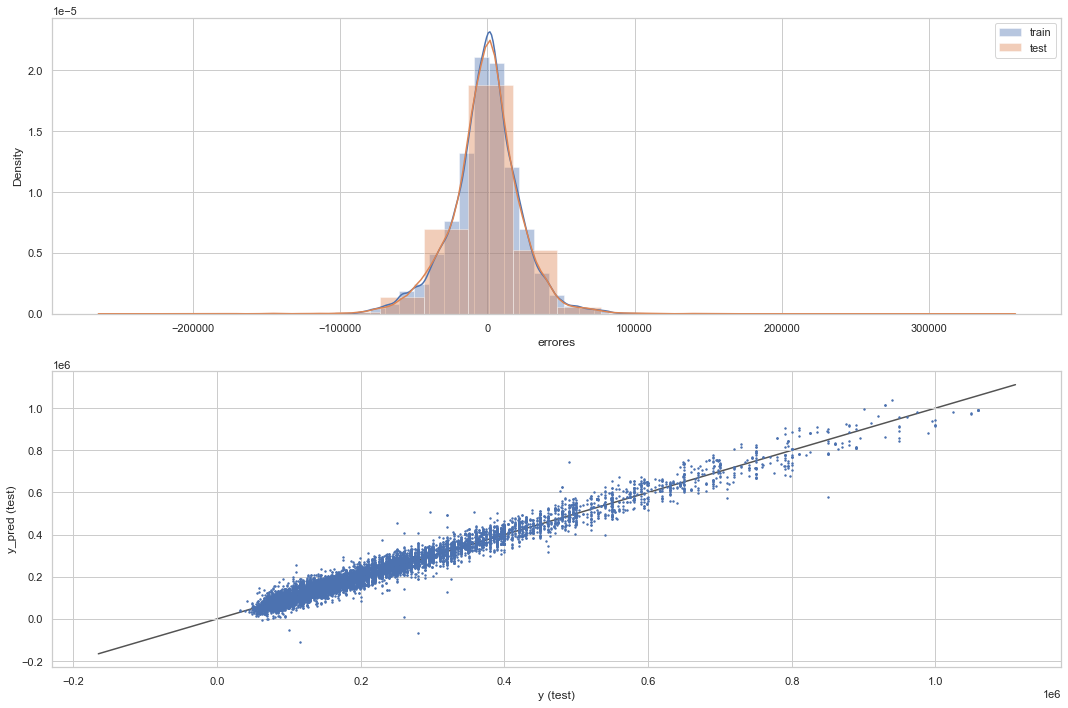

In [79]:
#5. Veamos el nuevo desempe√±o
evaluar_regresion(ada_reg, X_train_new, X_test_new, y_train, y_test)

* Podemos observar que aplicando estas nuevas t√©cnicas logramos mejorar el desempe√±o del modelo.
* Generaliza bien, sin presentar **underfitting** o **overfitting**.

### Reducci√≥n de Dimensionalidad

Otra buena t√©cnica de preprocesamiento es la llamada *reducci√≥n de dimensionalidad*, la cual busca transformar y llevar nuestro dataset a una versi√≥n "reducida" conteniendo aquellos datos de mayor relevancia.

Para este caso aplicaremos **An√°lisis de Componentes Principales** o **PCA**.

In [80]:
#1. Instanciamos un modelo PCA para el m√°ximo de componentes principales
pca = PCA(n_components=815)

In [81]:
#2. Definimos los conjuntos de variables
X_pca = df4.drop(columns='price')
y_pca = df4['price']

In [82]:
#3. Aplicaremos tambi√©n el polynomial features
X_nuevo = poly.fit_transform(X_pca)
# Aplicamos reducci√≥n de dimensionalidad
X_nuevo = pca.fit_transform(X_nuevo)
#Veamos los componentes generados
pca.components_

array([[ 0.01983901,  0.01902897,  0.01572794, ...,  0.        ,
         0.        ,  0.00125637],
       [-0.0204868 , -0.01954982, -0.02222141, ..., -0.        ,
        -0.        ,  0.00059752],
       [ 0.03100211,  0.03251965,  0.06378267, ..., -0.        ,
        -0.        , -0.00019885],
       ...,
       [-0.        , -0.01533802, -0.01626039, ..., -0.        ,
        -0.        ,  0.09140507],
       [ 0.        ,  0.06583261,  0.05018898, ...,  0.        ,
         0.        ,  0.00715922],
       [ 0.        , -0.02039191, -0.08624556, ...,  0.        ,
         0.        ,  0.03460866]])

In [83]:
#4. Con el nuevo conjunto hacemos un train-test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_nuevo, y_pca, test_size = 0.3, random_state = 42)

Hecho esto, aplicaremos el conjunto para entrenar un modelo de *regresion Lasso* b√°sico:

In [84]:
#5. Entrenamos el modelo
reg_pca=Lasso(alpha=1)
reg_pca.fit(X_train_pca, y_train_pca)

Lasso(alpha=1)

Ra√≠z del error cuadr√°tico medio en Train: 12487.751394303361
Ra√≠z del error cuadr√°tico medio en Test: 12768.706480290864


d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Users\FRED-104\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


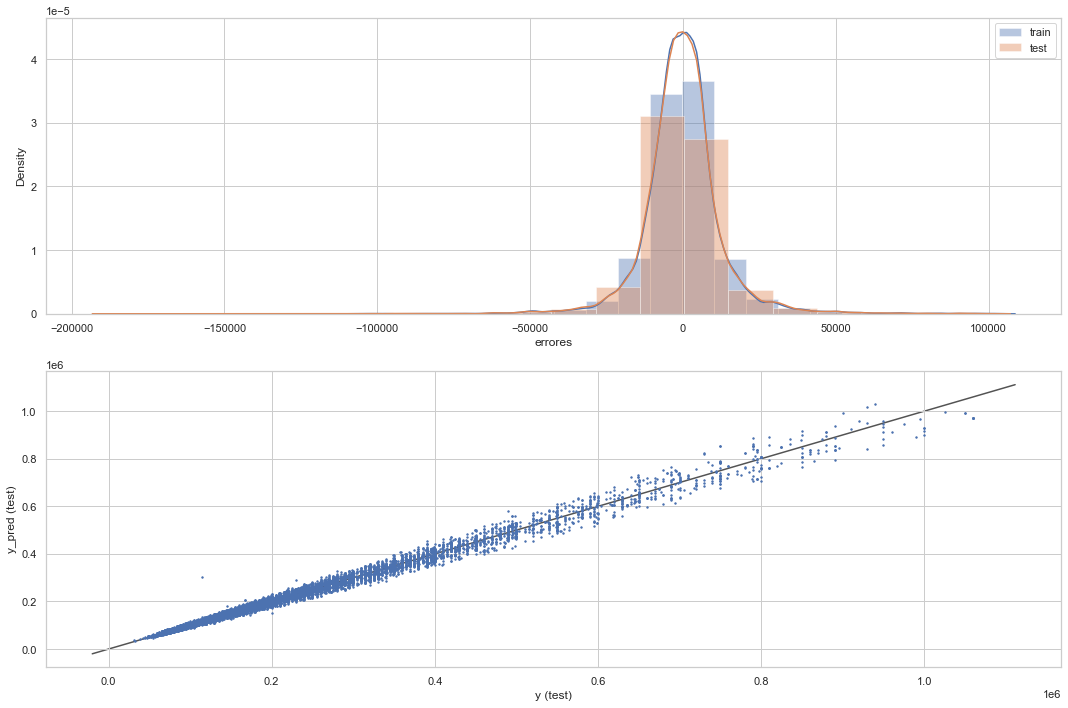

In [85]:
#Evaluamos el nuevo modelo
evaluar_regresion(reg_pca, X_train_pca, X_test_pca, y_train_pca, y_test_pca)

* Vemos que el error **mejor√≥** abrumadoramente.
* Las diferencias *train* vs. *test* son bajas, por lo que no hay presencia de **overfitting**.
* Generaliza y predice los datos de muy buena manera con un modelo sencillo.

## ML-Clustering
<a id='ML_Clustering'></a>

Por √∫ltimo, vamos a implementar un modelo de **clustering** para determinar si encontramos grupos de relaciones entre los datos:

* Usaremos el mismo concepto del preprocesamiento, donde buscaremos fijar una relaci√≥n entre los barrios y el precio.
    * Para ello usaremos las variables `lat`,`lon` y la etiqueta `price`.


In [86]:
#1. Separamos las variables a utilizar
X_cluster=df5[['lat', 'lon']]
y_cluster=df5['price']

NameError: name 'df5' is not defined

In [ ]:
#2. Instanciamos el modelo
km = KMeans(n_clusters=3, random_state=42)

In [ ]:
#3. Entrenamos
km = km.fit(X_cluster)
km

In [ ]:
#4. Guardemos las etiquetas y los centroides obtenidos
etiquetas = km.labels_
centros = km.cluster_centers_

In [ ]:
#5. Graficamos
sns.scatterplot(X_cluster.iloc[:,0], X_cluster.iloc[:,-1], hue=etiquetas)
sns.scatterplot(centros[:,0], centros[:,1],color='black', marker="+", s=1000)
plt.title('Clusterizaci√≥n de datos y centroides', fontsize=15)
plt.show()

A primera vista no parece que la cantidad de clusters elegidos sea la √≥ptima, por lo que utilizaremos el **m√©todo del codo** para determinar el mejor valor.

##### M√©todo del Codo

In [ ]:
Sum_of_squared_distances = []
# Definimos la cantidad de clusters a probar y vamos fiteando un modelo con ellos
K = np.arange(2,20) 
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X.shape[0]) # no es necesario sacar el promedio, si hacemos el grafico con la inersia completa da igual
    Sum_of_squared_distances.append(distancia_media)

plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K', fontsize=10)
plt.ylabel('Inercia media',fontsize=10)
plt.title('M√©todo del codo para el Dataset', fontsize=15, fontweight='black')

plt.show()

Si bien la curva presenta una caida suave podemos decir que la cantidad √≥ptima de clusters se ubica entre **3** y **4**.
Para corroborar aplicaremos tambi√©n el **m√©todo de silueta**.

##### M√©todo de Silhouette

In [ ]:
# Calcularemos Silhouette para k igual a 3 4 6 8 y 10
# Definici√≥n del dataset de trabajo
X_std = X_cluster

lista_k = [3, 4, 6, 8, 10]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std.iloc[:, 0], X_std.iloc[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-12, 12])
    ax2.set_xlim([-12, 12])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Con estos nuevos gr√°ficos podemos entonces observar que la mejor opci√≥n para la clusterizaci√≥n es la divisi√≥n en **3** grupos.
* Esta medida est√° relacionada al mismo concepto aplicado en [3.2.3 Codificaci√≥n de variables categ√≥ricas](#codificacion), donde se "clusteriz√≥ a mano" los distintos barrios seg√∫n el precio promedio del metro cuadrado.